$$
T_c(s) = C_p (\Theta_{ref}(s) - \Theta(s)) - \frac{C_d}{Js}T_c(s)
$$

$$
\Theta(s) = \frac{1}{Js^2} T_c(s)
$$

Reemplazando 2 en 1: 

$$
Js^2 \Theta(s) = C_p (\Theta_{ref}(s) - \Theta(s)) - C_d s \Theta(s)
$$

Despejando:

$$
(Js^2  + C_d s + C_p) \Theta(s) = C_p \Theta_{ref}(s)
$$

De esta forma se verifica la función de transferencia 

$$
\frac{\Theta(s)}{\Theta_{ref}(s)}  = \frac{C_p}{Js^2  + C_d s + C_p} 
$$

o bien, 

$$
\frac{\Theta(s)}{\Theta_{ref}(s)}  = \frac{\frac{C_p}{J}}{s^2  + \frac{C_d}{J} s + \frac{C_p}{J}} 
$$

Para relacionar esto con la frecuencia natural $\omega_n$ y el factor de amortiguamiento $\xi$

$$
\frac{\Theta(s)}{\Theta_{ref}(s)}  = \frac{\omega_n^2}{s^2  + 2\xi\omega_n s + \omega_n^2} 
$$

Se obtiene diréctamente

$$
\omega_n = \sqrt{\frac{C_p}{J}}
$$

Además, 

$$
\frac{C_d}{J} = 2\xi \sqrt{\frac{C_p}{J}} \implies \xi = \frac{1}{2}\frac{C_d}{\sqrt{JC_p}}$$

En particular, con los valores dados en la tabla

| Parámetro | Valor |
| :-: | :-: | 
| $J$ | 1000 [kg m²] |
| $\omega_n$ | 0,1 [rad/s] |
| $\xi$ | 0,7 |

Se obtienen los valores de $C_d$ y $C_p$

$$
C_p = \omega_n^2J = 10 \text{ kg m²/s²}
$$

$$
C_d = 2\xi\omega_n J = 140 \text{ kg m²/s}
$$

In [36]:
J = 1000
w_n = 0.1
xi = 0.7

C_p = w_n**2*J
C_d = 2*xi*w_n*J

Vamos con el grande...

$$
T_c(s) = C_p (\Theta_{ref}(s) - \Theta(s) - N_{LP3}(s)) - C_d \left(\frac{1}{Js}(T_c(s)+N_{LP1}(s)) + N_{LP2}(s)\right)
$$


$$
\Theta(s) = \frac{1}{Js^2} (T_c(s)+N_{LP1}(s))
$$


Reemplazando:

$$
Js^2\Theta(s)-N_{LP1}(s) = C_p (\Theta_{ref}(s) - \Theta(s) - N_{LP3}(s)) - C_d \left(s \Theta(s) + N_{LP2}(s)\right)
$$

Agrupando a un lado:

$$
(Js^2+C_d s + C_p)\Theta(s) = C_p \Theta_{ref}(s) - C_pN_{LP3}(s) - C_dN_{LP2}(s) + N_{LP1}(s)
$$

Finalmente, esto se puede expresar de la siguiente forma.

$$
\Theta(s) = \frac{C_p}{Js^2+C_d s + C_p} \Theta_{ref}(s) + \frac{- C_p}{Js^2+C_d s + C_p}N_{LP3}(s) + \frac{- C_d}{Js^2+C_d s + C_p}N_{LP2}(s) + \frac{1}{Js^2+C_d s + C_p}N_{LP1}(s)
$$

In [37]:
import scipy.signal as signal
import numpy as np 
import matplotlib.pyplot as plt

H_1 = signal.TransferFunction([1], [J, C_d, C_p])
H_2 = signal.TransferFunction([-C_d], [J, C_d, C_p])
H_3 = signal.TransferFunction([-C_p], [J, C_d, C_p])

t_s = 1e-2

N = 100000

theta_ref = np.random.normal(0, 1, N)
t = np.linspace(0, N*t_s, N)

T, theta1, _ = signal.lsim(H_1, theta_ref, t)
T, theta2, _ = signal.lsim(H_2, theta_ref, t)
T, theta3, _ = signal.lsim(H_3, theta_ref, t)

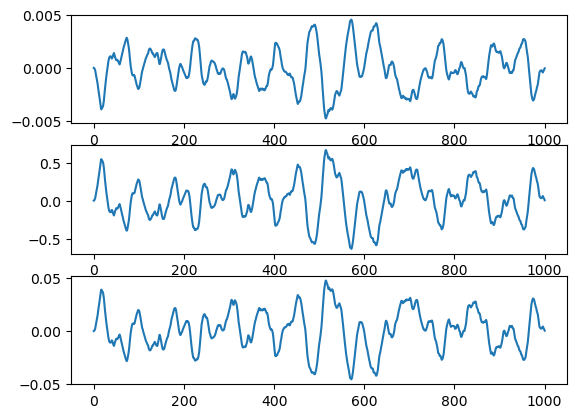

In [38]:
fig, ax = plt.subplots(3,1)
ax[0].plot(T, theta1)
ax[1].plot(T, theta2)
ax[2].plot(T, theta3)

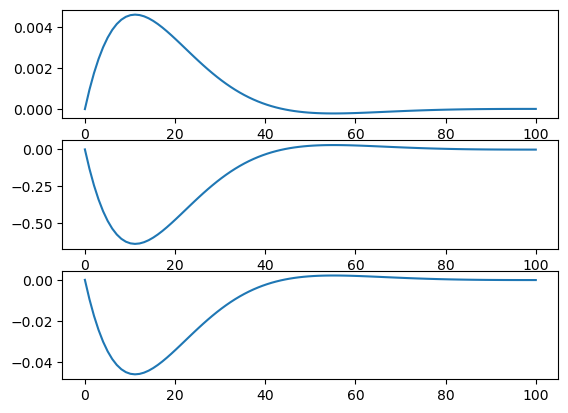

In [39]:
T, h1 = signal.impulse(H_1)
T, h2 = signal.impulse(H_2)
T, h3 = signal.impulse(H_3)

fig, ax = plt.subplots(3,1)
ax[0].plot(T, h1)
ax[1].plot(T, h2)
ax[2].plot(T, h3)

In [40]:
f = np.fft.fftshift(np.fft.fftfreq(N, t_s))
psd_N = np.array([1/t_s for x in f])

def H_1fun(f):
    w = 2*np.pi*f
    return 1/(J*(1j*w)**2+C_d*1j*w+C_p)

def H_2fun(f):
    w = 2*np.pi*f
    return -C_d/(J*(1j*w)**2+C_d*1j*w+C_p)

def H_3fun(f):
    w = 2*np.pi*f
    return -C_p/(J*(1j*w)**2+C_d*1j*w+C_p)

S_1 = np.array([np.abs(H_1fun(fi))**2 for fi in f])*psd_N
S_2 = np.array([np.abs(H_2fun(fi))**2 for fi in f])*psd_N
S_3 = np.array([np.abs(H_3fun(fi))**2 for fi in f])*psd_N


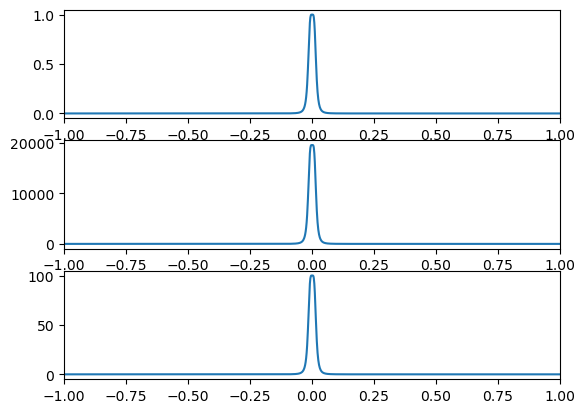

In [47]:
fig, ax = plt.subplots(3,1)
ax[0].plot(f, S_1)
ax[1].plot(f, S_2)
ax[2].plot(f, S_3)
for i in [0,1,2]:
    ax[i].set_xlim((-1,1))